# Doing EDA on E-Commerce Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("E-Commerce_Data/Amazon_Products.csv")
df.head()

C:\Users\Akash\AppData\Local\Temp\ipykernel_5520\4000174719.py:1: DtypeWarning: Columns (5,6,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,2

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(10004, 895)

### Selecting Relevant features

In [4]:
df = df[["manufacturer","price","number_available_in_stock","number_of_reviews","number_of_answered_questions","average_review_rating",]]
df.head()

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating
0,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars
1,FunkyBuys,£16.99,NaN,2.0,1.0,4.5 out of 5 stars
2,ccf,£9.99,2 new,17.0,2.0,3.9 out of 5 stars
3,Hornby,£39.99,NaN,1.0,2.0,5.0 out of 5 stars
4,Hornby,£32.19,NaN,3.0,2.0,4.7 out of 5 stars


In [5]:

df['price'] = df['price'].fillna('£0')
def remove_currency(x):
    x = x.replace("£", "").replace(',','')
    return x
df['price'] = df['price'].apply(remove_currency)
df.head()


,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating
0,Hornby,3.42,5 new,15.0,1.0,4.9 out of 5 stars
1,FunkyBuys,16.99,NaN,2.0,1.0,4.5 out of 5 stars
2,ccf,9.99,2 new,17.0,2.0,3.9 out of 5 stars
3,Hornby,39.99,NaN,1.0,2.0,5.0 out of 5 stars
4,Hornby,32.19,NaN,3.0,2.0,4.7 out of 5 stars


### Using Regex to get price range

In [6]:
import re
copy_rows = []
for index, row in df.iterrows():
    range_arr = re.findall("\d*\.\d*",row['price'])
    if len(range_arr) > 0:
        # print(row)
        copy_rows.append(list(row.values))
df_copy = pd.DataFrame(copy_rows)
df_copy.columns = df.columns
df = df_copy

price_min = []
price_max = []
def get_range(x):
    r = x.split(" - ")
    if len(r) >=2:
        price_min.append(float(r[0]))
        price_max.append(float(r[1]))
    else:
        price_min.append(float(r[0]))
        price_max.append(float(r[0]))
    return x
df['price'].apply(get_range)
df['price_min'] = price_min
df['price_max'] = price_max

df.head()


,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,price_min,price_max
0,Hornby,3.42,5 new,15.0,1.0,4.9 out of 5 stars,3.42,3.42
1,FunkyBuys,16.99,NaN,2.0,1.0,4.5 out of 5 stars,16.99,16.99
2,ccf,9.99,2 new,17.0,2.0,3.9 out of 5 stars,9.99,9.99
3,Hornby,39.99,NaN,1.0,2.0,5.0 out of 5 stars,39.99,39.99
4,Hornby,32.19,NaN,3.0,2.0,4.7 out of 5 stars,32.19,32.19


### Using Regex to clean average_review_rating column

In [7]:
df["average_review_rating"] = df['average_review_rating'].fillna('0.0 out of 5 stars')
def average_rating(x):
    ratings = re.findall("\d\.\d" , x)
    return float(ratings[0])

df["average_review_rating"] = df["average_review_rating"].apply(average_rating)
df.head()


,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,price_min,price_max
0,Hornby,3.42,5 new,15.0,1.0,4.9,3.42,3.42
1,FunkyBuys,16.99,NaN,2.0,1.0,4.5,16.99,16.99
2,ccf,9.99,2 new,17.0,2.0,3.9,9.99,9.99
3,Hornby,39.99,NaN,1.0,2.0,5.0,39.99,39.99
4,Hornby,32.19,NaN,3.0,2.0,4.7,32.19,32.19


### Cleaning number_of_reviews column

In [8]:
df["number_of_reviews"] = df["number_of_reviews"].fillna(0)
df["number_of_reviews"] = df["number_of_reviews"].apply(lambda x: int(x.replace(',','')) if type(x) == str else int(x))

### Cleaning number_available_in_stock column

In [9]:
df["number_available_in_stock"] = df["number_available_in_stock"].fillna('0')
df = df[df["number_available_in_stock"].apply(lambda x: len(re.findall("\d",x))) > 0]
df.head()

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,price_min,price_max
0,Hornby,3.42,5 new,15,1.0,4.9,3.42,3.42
1,FunkyBuys,16.99,0,2,1.0,4.5,16.99,16.99
2,ccf,9.99,2 new,17,2.0,3.9,9.99,9.99
3,Hornby,39.99,0,1,2.0,5.0,39.99,39.99
4,Hornby,32.19,0,3,2.0,4.7,32.19,32.19


### Getting condition of product in stock

In [10]:
condition = []
nums = []
def get_stock(i):
    i = str(i)
    num  = i.split('\xa0')
    nums.append(int(num[0]))
    if len(num) >=2:
        condition.append(num[1])
    else:
        condition.append("unavailable")

df["number_available_in_stock"].apply(get_stock)
nums = np.array(nums)
condition = np.array(condition)


### Getting Dummies for conditions

In [11]:

condition_dummies = pd.get_dummies(condition)
df = pd.concat([df.drop(columns=["number_available_in_stock"]),pd.DataFrame(nums),condition_dummies],axis=1,join='inner')
df["condition"] = condition
df = df.rename(columns={0: 'number_available_in_stock',})
df.head()

,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,price_min,price_max,number_available_in_stock,collectible,new,refurbished,unavailable,used,condition
0,Hornby,3.42,15,1.0,4.9,3.42,3.42,5,0,1,0,0,0,new
1,FunkyBuys,16.99,2,1.0,4.5,16.99,16.99,0,0,0,0,1,0,unavailable
2,ccf,9.99,17,2.0,3.9,9.99,9.99,2,0,1,0,0,0,new
3,Hornby,39.99,1,2.0,5.0,39.99,39.99,0,0,0,0,1,0,unavailable
4,Hornby,32.19,3,2.0,4.7,32.19,32.19,0,0,0,0,1,0,unavailable


### Saving cleaned dataset

In [12]:
df.to_csv("Cleaned_Data.csv")

## Scatter Plotting number_of_reviews with different features

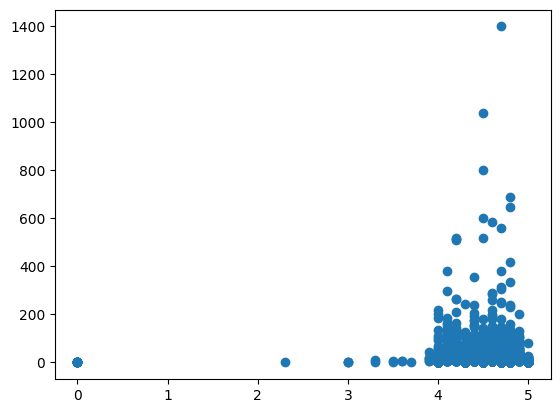

In [13]:
plt.scatter( df["average_review_rating"],df["number_of_reviews"])


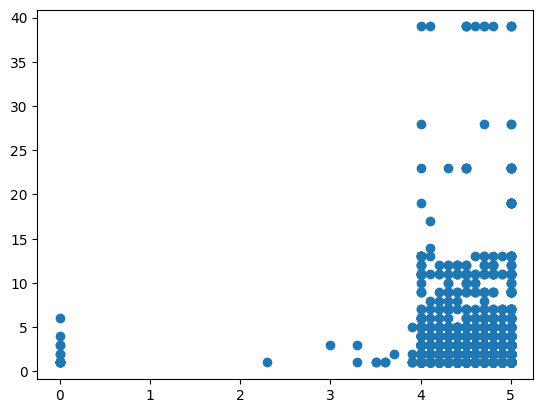

In [14]:
plt.scatter(df["average_review_rating"],df["number_of_answered_questions"])

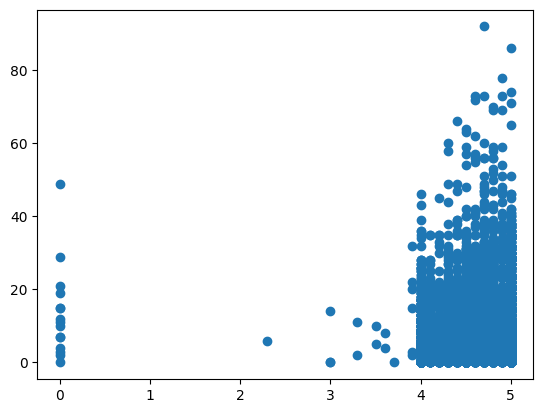

In [15]:
plt.scatter(df["average_review_rating"],df["number_available_in_stock"])

## Conclusion:

There appears to be a lot of 4-5 star reviews in this dataset which makes it not suitable for predicting the average rating of a product